In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('http://aima.cs.berkeley.edu/data/iris.csv',sep=',', header=None)


In [4]:
data.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'kinds']
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,kinds
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data['kinds_code'] = pd.Categorical(data['kinds']).codes


In [5]:
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,kinds,kinds_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [6]:
data['kinds'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: kinds, dtype: int64

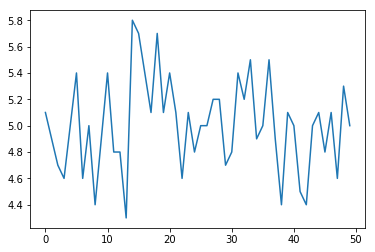

In [7]:
data.loc[data['kinds_code'] == 0, 'sepal_len'].plot()
plt.show()

In [8]:
groups = data.groupby('kinds').mean()
groups

,sepal_len,sepal_wid,petal_len,petal_wid,kinds_code
kinds,,,,,
setosa,5.006,3.418,1.464,0.244,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


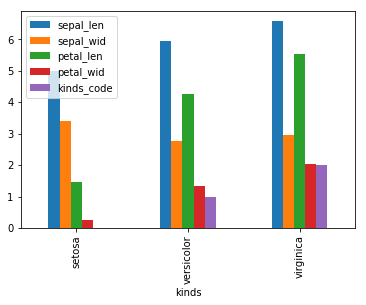

In [10]:
groups.plot.bar()
plt.show()

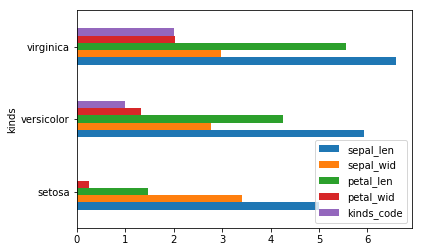

In [11]:
groups.plot.barh()

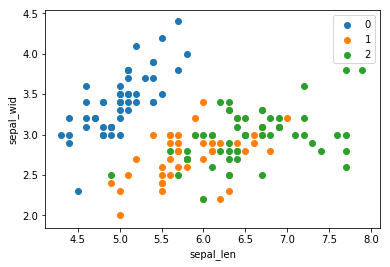

In [17]:
plt.scatter(data.loc[data['kinds_code'] == 0,'sepal_len'], data.loc[data['kinds_code'] == 0,'sepal_wid'], label='0')
plt.scatter(data.loc[data['kinds_code'] == 1,'sepal_len'], data.loc[data['kinds_code'] == 1,'sepal_wid'], label='1')
plt.scatter(data.loc[data['kinds_code'] == 2,'sepal_len'], data.loc[data['kinds_code'] == 2,'sepal_wid'], label='2')
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend()
plt.show()

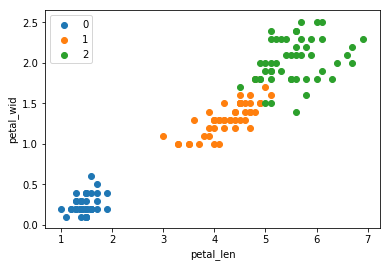

In [18]:
plt.scatter(data.loc[data['kinds_code'] == 0,'petal_len'], data.loc[data['kinds_code'] == 0,'petal_wid'], label='0')
plt.scatter(data.loc[data['kinds_code'] == 1,'petal_len'], data.loc[data['kinds_code'] == 1,'petal_wid'], label='1')
plt.scatter(data.loc[data['kinds_code'] == 2,'petal_len'], data.loc[data['kinds_code'] == 2,'petal_wid'], label='2')
plt.xlabel('petal_len')
plt.ylabel('petal_wid')
plt.legend()
plt.show()

#  模型训练，选择十折交叉验证评价模型的好坏

In [19]:
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
model = {'knn': KNeighborsClassifier(6), 
        'gnb': GaussianNB(), 
        'lr': LogisticRegression(multi_class="multinomial",solver="lbfgs")}
x = data[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']]
y = data['kinds_code']

for name, model in model.items():
    score = cross_val_score(model, x, y, cv=5).mean()
    print(name, score)

knn 0.9800000000000001
gnb 0.9533333333333334
lr 0.9733333333333334
